## Target: 
- A target market analysis is an assessment of how your product or service fits into a specific market and where it will gain the most.

## Task:
- Q1: What was the best Year for sales? How much was earned that Year?
- Q2: What was the best month for sales? How much was earned that month?
- Q3: What City had the highest number of sales?
- Q4: What time should we display adverstisement to maximize likelihood of customer's buying product?
- Q5: What products are most often sold together?
- Q6: What product sold the most? Why do you think it sold the most?

## How Much Probability?
- Q1: How much probability for next people will ordered USB-C Charging Cable?
- Q2: How much probability for next people will ordered iPhone?
- Q3: How much probability for next people will ordered Google Phone?
- Q4: How much probability other peoples will ordered Wired Headphones?

In [88]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/Sales_April_2019.csv')

### Data Preprocessing 
   - we have sales data for each month in a different csv file, so I will merge the data into one csv file

#### Merge Data

In [3]:
# Get a list of all csv files in the data directory
all_files = glob.glob("data/Sales_*.csv")

In [4]:
# Create a list of dataframes by reading each csv file using pd.read_csv()
dfs = [pd.read_csv(f) for f in all_files]

In [5]:
# Concatenate all the dataframes into a single dataframe using pd.concat()
sales_data = pd.concat(dfs, ignore_index=True)

In [6]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


### Check Data
    - Missing values 
    - Duplicated values
    - Check if data types are in correct format

#### Missing Values

In [7]:
missing_values = sales_data.isnull().sum()

In [8]:
missing_values

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
# Filter the dataset based on the missing values mask
missing_data = sales_data[sales_data.isnull().any(axis=1)]
print(missing_data.head())

     Order ID Product Quantity Ordered Price Each Order Date Purchase Address
264       NaN     NaN              NaN        NaN        NaN              NaN
648       NaN     NaN              NaN        NaN        NaN              NaN
680       NaN     NaN              NaN        NaN        NaN              NaN
1385      NaN     NaN              NaN        NaN        NaN              NaN
1495      NaN     NaN              NaN        NaN        NaN              NaN


In [10]:
missing_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Calculate the percentage of missing values in each column
percent_missing = sales_data.isnull().sum() * 100 / len(sales_data)
percent_missing

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64

- ideally: ask why data is missing? 
    - as we can see, the whole row is missing for 545 rows, its not like there is order_id but price is missing
    - this means that there are no products being sold as the entire row is empty
- 0.29% of data is missing, we assume there no products so we will remove them. 

#### Dropping Missing Values 

In [12]:
sales_data.dropna(inplace=True)

#### Duplicated values

In [13]:
duplicates = sales_data[sales_data.duplicated()]
duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
440,296081,Flatscreen TV,1,300,12/30/19 16:52,"970 Sunset St, Austin, TX 73301"
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1735,297311,Bose SoundSport Headphones,1,99.99,12/07/19 07:30,"858 Willow St, Los Angeles, CA 90001"
2822,298358,Apple Airpods Headphones,1,150,12/04/19 15:57,"482 8th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
184211,220392,Lightning Charging Cable,1,14.95,06/08/19 17:13,"472 8th St, Portland, ME 04101"
184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184715,220882,Lightning Charging Cable,1,14.95,06/13/19 17:53,"588 Lake St, Boston, MA 02215"
185584,221711,Bose SoundSport Headphones,1,99.99,06/15/19 16:36,"139 West St, New York City, NY 10001"


- there seems to be rows with column names as values

#### Remove rows with column names as values

In [14]:
sales_data = sales_data[~sales_data.apply(lambda x: any(x == sales_data.columns), axis=1)]

In [15]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


#### Check For Duplicates Again

In [16]:
duplicates = sales_data[sales_data.duplicated()]
duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
440,296081,Flatscreen TV,1,300,12/30/19 16:52,"970 Sunset St, Austin, TX 73301"
1735,297311,Bose SoundSport Headphones,1,99.99,12/07/19 07:30,"858 Willow St, Los Angeles, CA 90001"
2822,298358,Apple Airpods Headphones,1,150,12/04/19 15:57,"482 8th St, San Francisco, CA 94016"
3131,298657,Lightning Charging Cable,1,14.95,12/01/19 18:22,"428 12th St, Atlanta, GA 30301"
3377,298883,Wired Headphones,1,11.99,12/28/19 18:07,"516 Willow St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
182495,218756,AAA Batteries (4-pack),1,2.99,06/11/19 14:54,"362 Hickory St, Boston, MA 02215"
182766,219007,AA Batteries (4-pack),1,3.84,06/24/19 11:16,"42 8th St, Los Angeles, CA 90001"
184211,220392,Lightning Charging Cable,1,14.95,06/08/19 17:13,"472 8th St, Portland, ME 04101"
184715,220882,Lightning Charging Cable,1,14.95,06/13/19 17:53,"588 Lake St, Boston, MA 02215"


##### Duplicated Dropped From 618 -> 264
    - lets analyze why are there 264 rows dups
    - there seems to be no duplicaties, there seems to be different order_id for 264 rows

In [20]:
num_duplicates = sales_data.duplicated().sum()
num_duplicates

264

In [18]:
duplicates = sales_data.duplicated()
duplicated_rows = sales_data[duplicates]
duplicated_rows.head(n=5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
440,296081,Flatscreen TV,1,300,12/30/19 16:52,"970 Sunset St, Austin, TX 73301"
1735,297311,Bose SoundSport Headphones,1,99.99,12/07/19 07:30,"858 Willow St, Los Angeles, CA 90001"
2822,298358,Apple Airpods Headphones,1,150,12/04/19 15:57,"482 8th St, San Francisco, CA 94016"
3131,298657,Lightning Charging Cable,1,14.95,12/01/19 18:22,"428 12th St, Atlanta, GA 30301"
3377,298883,Wired Headphones,1,11.99,12/28/19 18:07,"516 Willow St, Los Angeles, CA 90001"


- The duplicates are not based on the Order ID alone. It seems that the combination of Order ID, Product, Quantity Ordered, Price Each, Order Date, and Purchase Address are considered duplicates.
- Lets check if Order ID is duplicated since other variables can be the same. For example, purchase address can be same. 

#### Check for Duplicate Order ID

In [21]:
sales_data[sales_data.duplicated(subset=['Order ID'], keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
16,295681,Google Phone,1,600,12/25/19 12:37,"79 Elm St, Boston, MA 02215"
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215"
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215"
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215"
36,295698,Vareebadd Phone,1,400,12/13/19 14:32,"175 1st St, New York City, NY 10001"
...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1,3.84,06/18/19 11:37,"990 Walnut St, Los Angeles, CA 90001"
186822,222884,Google Phone,1,600,06/04/19 12:06,"819 Pine St, New York City, NY 10001"
186823,222884,USB-C Charging Cable,1,11.95,06/04/19 12:06,"819 Pine St, New York City, NY 10001"
186842,222903,iPhone,1,700,06/07/19 22:21,"685 Hickory St, New York City, NY 10001"


- There are duplicates for order ID in the sales_data dataset, it means that there are multiple products associated with the same order. This is a common scenario in ecommerce transactions where a customer can purchase multiple products in a single order. So this is pretty normal

#### Check Data Types

In [23]:
sales_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### Convert Data Types

In [38]:
sales_data.loc[:, 'Order ID'] = pd.to_numeric(sales_data['Order ID'], errors='coerce').astype('Int64')
sales_data.loc[:, 'Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'], errors='coerce').astype('Int64')
sales_data.loc[:, 'Price Each'] = pd.to_numeric(sales_data['Price Each'], errors='coerce')
sales_data.loc[:, 'Order Date'] = pd.to_datetime(sales_data['Order Date'], format='%m/%d/%y %H:%M')

In [27]:
sales_data.dtypes

Order ID                     Int64
Product                     object
Quantity Ordered             Int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Data is Cleaned. Time for Analysis.

## Q1: What was the best Year for sales? How much was earned that Year?

In [29]:
sales_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [39]:
# create a new column called Sales
sales_data['Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

# group the data by year and sum up the sales for each year
sales_by_year = sales_data.groupby(sales_data['Order Date'].dt.year)['Sales'].sum()

# find the year with the highest sales and the earnings that year
best_year = sales_by_year.idxmax()
earnings = sales_by_year.loc[best_year]

print(f"The best year for sales was {best_year} with earnings of ${earnings:,.2f}")


The best year for sales was 2019 with earnings of $34,483,365.68


### Visualization

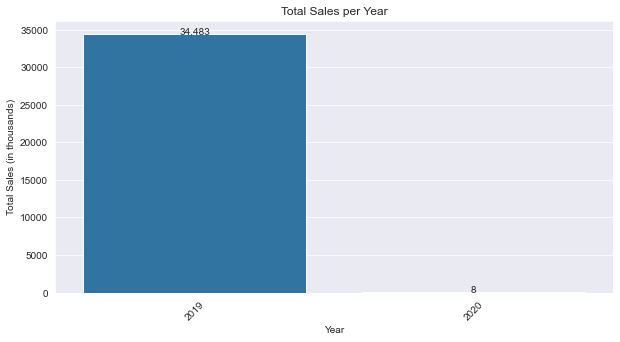

In [41]:
# Create a new column for total sales
sales_data['Total Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

# Group the data by year and calculate the total sales
sales_by_year = sales_data.groupby(sales_data['Order Date'].dt.year)['Total Sales'].sum()

# Plot the total sales per year
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_year.index, y=sales_by_year.values/1000)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Sales (in thousands)')
plt.title('Total Sales per Year')

# Add the sales_by_year numbers on the plot
for i, v in enumerate(sales_by_year.values):
    plt.text(i, v/1000+1, f"{int(v/1000):,}", ha='center', fontsize=10)

plt.show()


## Q2: What was the best month for sales? How much was earned that month?

In [60]:
# Convert Order Date column to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Create a new column for month
sales_data['Month'] = sales_data['Order Date'].dt.month_name()

# Calculate the total sales for each month
sales_by_month = sales_data.groupby('Month')['Total Sales'].sum()

# Find the month with the highest total sales
best_month = sales_by_month.idxmax()
total_sales = sales_by_month.max()

print(f'The best month for sales was {best_month} with total sales of ${total_sales:,.0f}.')


The best month for sales was December with total sales of $4,613,443.


### Visualization

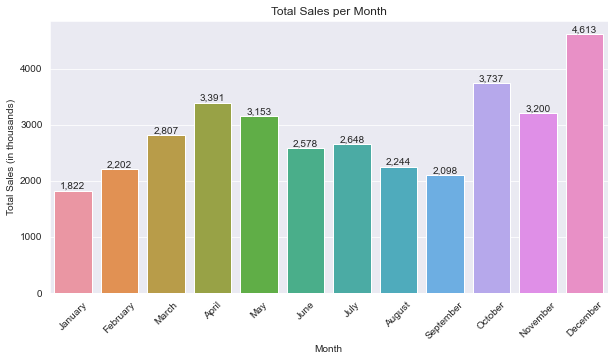

In [59]:
# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the months
sales_by_month = sales_by_month.reindex(pd.Categorical(sales_by_month.index, categories=month_order))

sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sales_by_month.index, y=sales_by_month.values/1000)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Sales (in thousands)')
plt.title('Total Sales per Month')

# Add value labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height():,.0f}', ha='center', va='bottom', fontsize=10)

plt.show()


## Q3: What City had the highest number of sales?

In [62]:
# Create a new column for City by splitting the Purchase Address column on the comma and extracting the city name
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

# Group the data by city and calculate the total sales
sales_by_city = sales_data.groupby('City')['Total Sales'].sum()

# Find the city with the highest total sales
best_city = sales_by_city.idxmax()
total_sales = sales_by_city.max()

# Print the results
print(f'The city with the highest sales was {best_city} with total sales of ${total_sales:,.0f}.')

The city with the highest sales was San Francisco with total sales of $8,262,204.


### Visualization

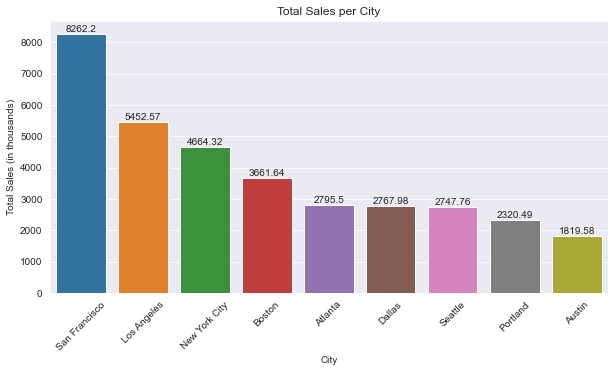

In [64]:
# Sort the cities by total sales
sales_by_city = sales_by_city.sort_values(ascending=False)

# Plot the bar chart
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values/1000)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Total Sales (in thousands)')
plt.title('Total Sales per City')

# Add the sales values to the top of each bar
for i, v in enumerate(sales_by_city.values/1000):
    plt.annotate(str(round(v,2)), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.show()

## Q4: What time should we display adverstisement to maximize likelihood of customer's buying product?

In [66]:
# Convert Order Date column to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Extract the hour from the order time
sales_data['Order Hour'] = sales_data['Order Date'].dt.hour

# Group the data by hour and calculate the total sales
sales_by_hour = sales_data.groupby('Order Hour')['Total Sales'].sum()

# Find the hour with the highest total sales
best_hour = sales_by_hour.idxmax()
total_sales = sales_by_hour.max()

print(f"The best hour for sales is {best_hour}:00 with total sales of ${total_sales:,.0f}.")

The best hour for sales is 19:00 with total sales of $2,412,939.


### Visualization

Text(0.5, 1.0, 'Total Sales by Hour')

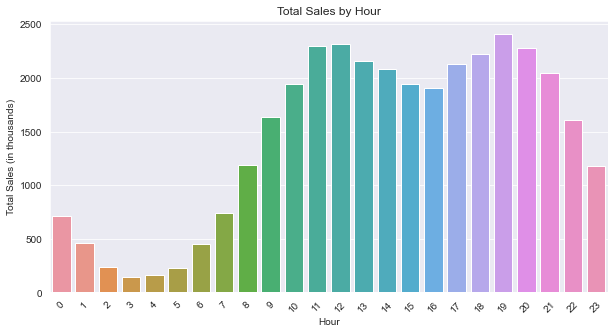

In [74]:
# Create a bar plot of the sales by hour
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sales_by_hour.index, y=sales_by_hour.values/1000)
plt.xticks(rotation=45)
plt.xlabel('Hour')
plt.ylabel('Total Sales (in thousands)')
plt.title('Total Sales by Hour')


## Q5: What products are most often sold together?

In [75]:
from collections import Counter
from itertools import combinations

# Identify the orders with multiple products
order_counts = sales_data['Order ID'].value_counts()
multiple_products = order_counts[order_counts > 1].index

# Create a list of the products sold together for each order
product_lists = []
for order in multiple_products:
    products = sales_data.loc[sales_data['Order ID'] == order, 'Product'].tolist()
    product_lists.append(products)

# Count the frequency of the combinations of products
product_counts = Counter()
for products in product_lists:
    product_counts.update(Counter(combinations(products, 2)))

# Print the most commonly sold combinations of products
for products, count in product_counts.most_common(10):
    print(products, count)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Visualization

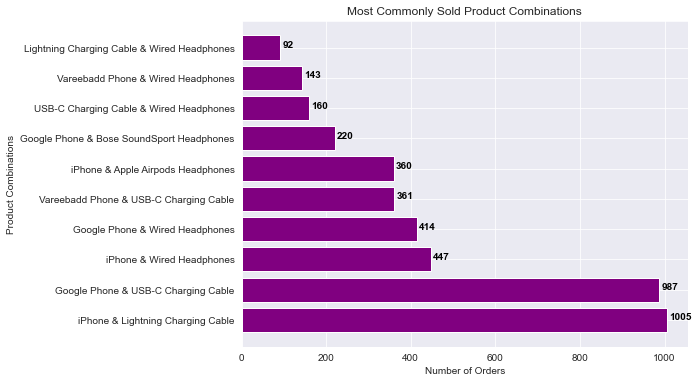

In [76]:
# Get the top 10 most commonly sold combinations of products
top_combinations = product_counts.most_common(10)

# Extract the product combinations and their counts
product_combinations = [f"{combo[0][0]} & {combo[0][1]}" for combo in top_combinations]
product_counts = [combo[1] for combo in top_combinations]

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(product_combinations, product_counts, color='purple')

# Add axis labels and title
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Product Combinations')
ax.set_title('Most Commonly Sold Product Combinations')

# Add the count values on top of the bars
for i, v in enumerate(product_counts):
    ax.text(v + 5, i, str(v), color='black', fontweight='bold')

plt.show()

## Q6: What product sold the most? Why do you think it sold the most?

In [77]:
# Group the sales data by product and sum up the quantity sold for each product
product_sales = sales_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

# Print the product that sold the most and its total quantity sold
most_sold_product = product_sales.index[0]
most_sold_quantity = product_sales.iloc[0]
print(f"The most sold product is {most_sold_product} with a total quantity sold of {most_sold_quantity}.")


The most sold product is AAA Batteries (4-pack) with a total quantity sold of 31017.


- AAA Batteries were sold the most, some reasons may be that the item is in need of frequent repleacement, is priced low, and used widely in other technologies. 

### Visualization

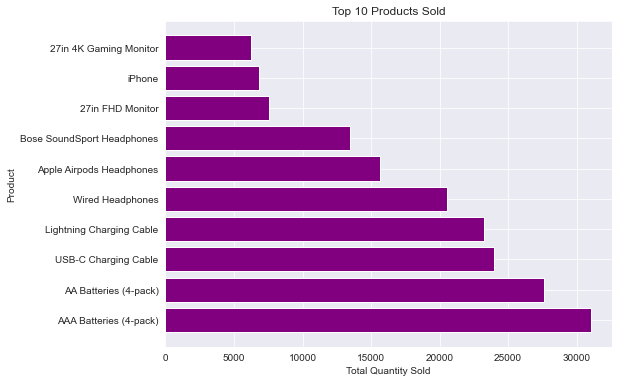

In [82]:
# Create a horizontal bar chart of the top 10 products sold
top_10_products = product_sales.head(10)
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_10_products.index, top_10_products.values, color='purple')
ax.set_xlabel('Total Quantity Sold')
ax.set_ylabel('Product')
ax.set_title('Top 10 Products Sold')
plt.show()

## Probabilites
## Q1: How much probability for next people will ordered USB-C Charging Cable?

In [83]:
# Calculate the total number of orders
total_orders = len(sales_data['Order ID'].unique())

# Calculate the number of orders that include the USB-C Charging Cable
usb_orders = len(sales_data[sales_data['Product'] == 'USB-C Charging Cable']['Order ID'].unique())

# Calculate the probability of an order including the USB-C Charging Cable
usb_probability = usb_orders / total_orders

print(f"The probability of the next person ordering a USB-C Charging Cable is {usb_probability:.2%}.")


The probability of the next person ordering a USB-C Charging Cable is 12.25%.


## Q2: How much probability for next people will ordered iPhone?

In [84]:
iphone_orders = sales_data[sales_data['Product'] == 'iPhone']
iphone_order_count = len(iphone_orders)
total_order_count = len(sales_data)
iphone_order_probability = iphone_order_count / total_order_count
print(f"The probability of the next order being for an iPhone is {iphone_order_probability:.2%}")


The probability of the next order being for an iPhone is 3.68%


## Q3: How much probability for next people will ordered Google Phone?

In [86]:
# Count the number of orders that included a Google Phone
google_phone_orders = sales_data.loc[sales_data['Product'] == 'Google Phone', 'Order ID'].nunique()

# Calculate the probability of the next person ordering a Google Phone
probability_google_phone = google_phone_orders / total_orders

print(f"The probability of the next person ordering a Google Phone is {probability_google_phone:.2%}.")

The probability of the next person ordering a Google Phone is 3.09%.


## Q4: How much probability other peoples will ordered Wired Headphones?

In [87]:
wired_headphones_orders = sales_data[sales_data['Product'] == 'Wired Headphones']
total_orders = len(sales_data['Order ID'].unique())
wired_headphones_count = len(wired_headphones_orders['Order ID'].unique())
probability = wired_headphones_count / total_orders
print(f"The probability of other people ordering Wired Headphones is {probability:.2%}")

The probability of other people ordering Wired Headphones is 10.56%
